# Fraud Detection Using an Autoencoder and Variational Autoencoder








At the end of the code, a summary of the entire work is provided to offer a concise overview of the project.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

__DATASET__

- Data has 284807 rows and 31 coloumns


In [14]:
# importing the data from computer
df = pd.read_csv("C:\\Users\\ayush\\Downloads\\archive\\creditcard.csv")

## data shape and data head
print(f"shape of the data is {df.shape}")
print("head of the data is:")
df.head()  

shape of the data is (284807, 31)
head of the data is:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The Data Has no null values


In [15]:
## checking the null values in the data
df.isnull().values.any()

False

The Pie Chart shows that that data is higly inbalance 99.8% of the data come from same class(non-fraud)


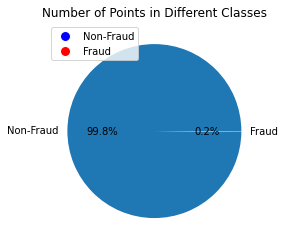

In [16]:
class_counts = df['Class'].value_counts()

class_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'])

plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
legend_colors = {'Non-Fraud': 'blue', 'Fraud': 'red'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in legend_colors.items()]
plt.legend(handles=handles, loc='upper left')

plt.title('Number of Points in Different Classes')
plt.ylabel('')
plt.show()


In [17]:
## writting the description of the data
description = df.describe()
print("description of the data is ")
description

description of the data is 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We normalized the data to ensure that all features are on the same scale.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

normalized_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


__SPLITTING DATA__
- Split the data into two classes: Fraud and non-fraud.
- Further divide the non-fraud class into a training set and a test set in a 0.8:0.2 ratio.
- Split the training set for the non-fraud class into a training set and a validation set in a 0.8:0.2 ratio.
- Use the training set for the non-fraud class exclusively for training the autoencoders and variational autoencoders.
- Do not use the fraud class data during the training process.
- Split the fraud class data into a validation set and a test set in a 0.5:0.5 ratio.
- Utilize the validation set for the fraud class to tune hyperparameters.


In [19]:
## splitting the data into fraud and nonfraud class
df_nonfraud = normalized_df[normalized_df['Class'] == 0]
df_fraud = normalized_df[normalized_df['Class'] == 1]

## splitting the data into training and testing
from sklearn.model_selection import train_test_split 

## for the nonfraud dataset
X_nonfraud = df_nonfraud.drop(columns=['Class']) 
y_nonfraud = df_nonfraud['Class']  

X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_nonfraud, y_nonfraud, test_size=0.2, random_state=42)
X_train_nf, X_val_nf, y_train_nf, y_val_nf = train_test_split(X_train_nf, y_train_nf, test_size=0.25, random_state=42)

## for the fraud dataset
X_fraud = df_fraud.drop(columns=['Class'])  
y_fraud = df_fraud['Class']  

X_val_f, X_test_f, y_val_f, y_test_f = train_test_split(X_fraud, y_fraud, test_size=0.5, random_state=42)

We prepare the following datasets:
- Training data
- Validation data
- Validation labels
- Test data
- Test labels


In [20]:
X_train = X_train_nf

val_data_x = np.concatenate((X_val_nf,X_val_f))
val_labels = np.concatenate((y_val_nf,y_val_f))

test_data_x = np.concatenate((X_test_nf,X_test_f))

t_nf = y_test_nf.shape[0]
t_f = y_test_f.shape[0]
test_labels = np.concatenate((y_test_nf,y_test_f))

### Architecture Autoencoder 

- Implemented code in PyTorch

###### Encoder Architecture:

  - Input layer: (30, 14) linear transformation followed by the RELU activation function.
  - Hidden layer: (14, 7) linear transformation followed by the RELU activation function.

###### Decoder Architecture:

  - Hidden layer: (7, 14) linear transformation followed by the RELU activation function.
  - Output layer: (14, 30) linear transformation followed by the sigmoid activation function.
    - The sigmoid activation ensures that the output values are within the range [0, 1], consistent with the input data.

###### Loss Function:
- Using the Mean Squared Error (MSE) loss function to minimize the reconstruction loss.
  - Objective: to minimize the difference between the output and the input, aiming to reconstruct the input data as accurately as possible.

###### Optimizer:
  - Utilizing the Adam optimizer with a learning rate of 0.01 for training the model.


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert training data to tensor
data_tensor = torch.tensor(X_train.values, dtype=torch.float)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30,14),
            nn.ReLU(),
            nn.Linear(14,7),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.ReLU(),
            nn.Linear(14,30),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the Autoencoder model
ae = Autoencoder()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters(), lr=0.001)

# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(data_tensor, data_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Training loop
for epoch in range(50):
    running_loss = 0.0
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        outputs = ae(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")


Epoch 1, Loss: 20.698291229491588
Epoch 2, Loss: 10.504863478825428
Epoch 3, Loss: 8.818229493364925
Epoch 4, Loss: 8.69041367751197
Epoch 5, Loss: 8.644033664982999
Epoch 6, Loss: 8.619011367904022
Epoch 7, Loss: 8.605101719935192
Epoch 8, Loss: 8.58146479880088
Epoch 9, Loss: 8.531570939725498
Epoch 10, Loss: 8.519358234101674
Epoch 11, Loss: 8.510024494637037
Epoch 12, Loss: 8.465366838994669
Epoch 13, Loss: 8.425464952364564
Epoch 14, Loss: 8.411410450993571
Epoch 15, Loss: 8.404839937313227
Epoch 16, Loss: 8.399830773327267
Epoch 17, Loss: 8.396583535533864
Epoch 18, Loss: 8.392401369375875
Epoch 19, Loss: 8.391442767053377
Epoch 20, Loss: 8.387907505966723
Epoch 21, Loss: 8.376739367697155
Epoch 22, Loss: 8.363860193319852
Epoch 23, Loss: 8.354704928206047
Epoch 24, Loss: 8.349455132993171
Epoch 25, Loss: 8.345611365046352
Epoch 26, Loss: 8.346434942359338
Epoch 27, Loss: 8.343383877450833
Epoch 28, Loss: 8.342189484712435
Epoch 29, Loss: 8.33841108091292
Epoch 30, Loss: 8.333989

- We compute the reconstruction loss of the training dataset, which consists of the non-fraud dataset.
- We calculate the mean and standard deviation of the reconstruction loss of the training dataset. These statistics will be used to determine the threshold.

In [22]:
data_tensor = torch.tensor(X_train.values, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)
reconstructed_loss = [criterion(ae(inputs), inputs).item() for inputs, _ in complete_loader]
reconstructed_loss_df = pd.DataFrame(reconstructed_loss)
re_statistics = reconstructed_loss_df.describe()
mean_value = re_statistics.loc['mean'].values[0]  # Extract mean value
std_value = re_statistics.loc['std'].values[0]


- We compute the reconstruction loss of the validation dataset.

In [23]:
data_tensor = torch.tensor(val_data_x, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)
reconstructed_loss_val = [criterion(ae(inputs), inputs).item() for inputs, _ in complete_loader]

- We define a range of threshold values based on the mean and standard deviation of the reconstruction loss.
- We classify the validation data for each threshold and calculate precision, recall, and accuracy.
- The threshold value for which we achieve the highest sum of precision and recall is chosen as the optimal threshold.


In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Range of threshold values
start_threshold = mean_value - 1 * std_value
end_threshold = mean_value + 15 * std_value
threshold_values = np.linspace(start_threshold, end_threshold, num=200)

# Initialize variables to store the best threshold and corresponding metrics
best_threshold = None
best_precision = 0
best_recall = 0
best_accuracy = 0


precisions = []
recalls = []
accuracies = []
# Iterate over the range of threshold values
for th in threshold_values:
    # Generate predicted labels based on the current threshold
    preds_labels = [0 if r < th else 1 for r in reconstructed_loss_val]
    
    # Calculate precision, recall, and accuracy
    precision = precision_score(val_labels, preds_labels)
    recall = recall_score(val_labels, preds_labels)
    accuracy = accuracy_score(val_labels, preds_labels)

    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    
    # Update the best threshold and corresponding metrics if necessary
    if precision + recall > best_precision + best_recall:
        best_precision = precision
        best_recall = recall
        best_accuracy = accuracy
        best_threshold = th

print("Best Threshold:", best_threshold)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.00814578651504541
Best Precision: 0.5576923076923077
Best Recall: 0.5894308943089431
Best Accuracy: 0.9962177590222207


- We plot the precision, recall, and accuracy curves against the threshold values.


0.00814578651504541


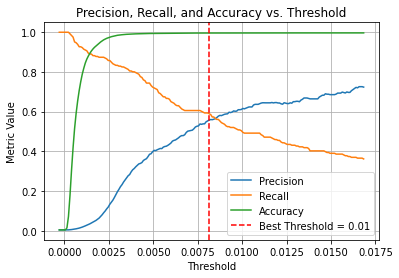

In [25]:
# Plot precision, recall, and accuracy vs. threshold
plt.plot(threshold_values, precisions, label='Precision')
plt.plot(threshold_values, recalls, label='Recall')
plt.plot(threshold_values, accuracies, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and Accuracy vs. Threshold')
best_threshold_index = np.argmax(np.array(precisions) + np.array(recalls))
best_threshold = threshold_values[best_threshold_index]
print(best_threshold)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.legend()
plt.legend()
plt.grid(True)
plt.show()

- We compute the reconstruction loss of the test dataset.

In [26]:
data_tensor = torch.tensor(test_data_x, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)
reconstructed_loss_test = [criterion(ae(inputs), inputs).item() for inputs, _ in complete_loader]

- We predict the labels of the test data based to optimal threshold.

In [27]:
th = best_threshold
preds_test = [0 if r < th else 1 for r in reconstructed_loss_test]

- We plot the reconstruction loss of the test dataset along with the threshold line.


56863
246


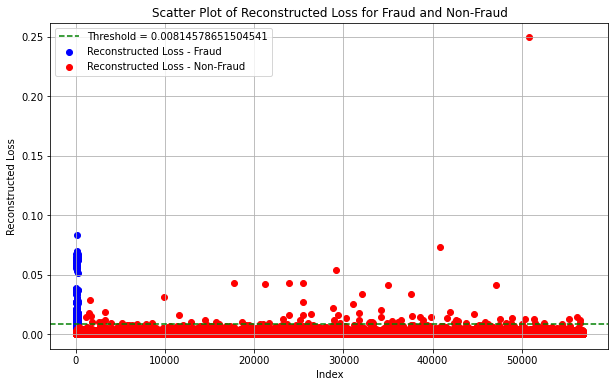

In [28]:
import matplotlib.pyplot as plt

reconstructed_loss_test_nf = reconstructed_loss_test[:t_nf]
print(len(reconstructed_loss_test_nf))

reconstructed_loss_test_f = reconstructed_loss_test[t_nf:]
print(len(reconstructed_loss_test_f))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstructed_loss_test_f)), reconstructed_loss_test_f, c='blue', label='Reconstructed Loss - Fraud')

plt.scatter(range(len(reconstructed_loss_test_nf)), reconstructed_loss_test_nf, c='red', label='Reconstructed Loss - Non-Fraud')
plt.axhline(y=th, color='green', linestyle='--', label=f'Threshold = {th}')
plt.xlabel('Index')
plt.ylabel('Reconstructed Loss')
plt.title('Scatter Plot of Reconstructed Loss for Fraud and Non-Fraud')
plt.legend()
plt.grid(True)
plt.show()


__RESULTS__

- We get the accuracy of 0..9963753523962948

In [29]:
accuracy = accuracy_score(test_labels, preds_test)
print("Accuracy:", accuracy)

Accuracy: 0.9967430702691344


- We plot the ROC Curve.
- We find the aread under curve which is 0.80

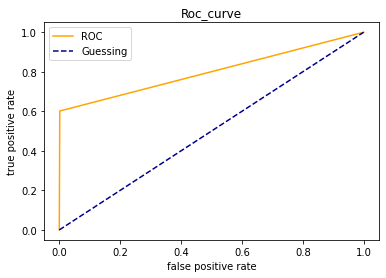

0.8000392184953451


In [30]:
from sklearn.metrics import roc_curve,roc_auc_score

#potting roc curve
fpr, tpr, thresholds = roc_curve(test_labels, preds_test)

plt.plot(fpr, tpr, color = 'orange', label = "ROC")
plt.plot([0,1],[0,1], color='darkblue', linestyle="--",label = "Guessing")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc_curve")
plt.legend()
plt.show()


auc_score = roc_auc_score(test_labels, preds_test)
print(auc_score)


- We find the confusion matrix of the test data set

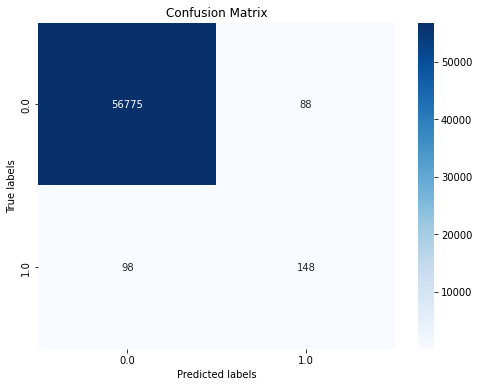

In [31]:
## confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(test_labels, preds_test)


classes = np.unique(test_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

-We get the F1 score for autoencoder 0.61

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds_test))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.63      0.60      0.61       246

    accuracy                           1.00     57109
   macro avg       0.81      0.80      0.81     57109
weighted avg       1.00      1.00      1.00     57109



### Variational Autoencoder (VAE) Architecture

- **Input Dimension**: 30 (Specified by `input_dim`)
- **Latent Dimension**: 7 (Specified by `latent_dim`)

#### Encoder Architecture:
- Input Layer: Fully connected layer with 30 input features, followed by ReLU activation.
- Hidden Layer: Fully connected layer with 14 units, followed by ReLU activation.
- Output Layer: Fully connected layer with `2 * latent_dim` units (14 units for each mean and log-variance of the latent space), followed by ReLU activation.

#### Decoder Architecture:
- Input Layer: Fully connected layer with `latent_dim` units, followed by ReLU activation.
- Hidden Layer: Fully connected layer with 14 units, followed by ReLU activation.
- Output Layer: Fully connected layer with 30 units (same as input dimension), followed by Sigmoid activation to constrain output values between 0 and 1.

#### Loss Function:
- **Reconstruction Loss (MSE)**: Measures the average squared difference between reconstructed output and original input. Encourages accurate data reconstruction.
- **KL Divergence**: Compares the inferred latent distribution to a standard normal distribution. Encourages a well-structured latent space resembling the standard distribution.

#### Optimizer:
Adam optimizer with a learning rate of 0.001 is used for training the VAE.


In [33]:
 
data_tensor = torch.tensor(X_train.values, dtype=torch.float)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 14),
            nn.ReLU(),
            nn.Linear(14, latent_dim*2),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 14),
            nn.ReLU(),
            nn.Linear(14, input_dim),
            nn.Sigmoid()  # Output values between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        latent_stats = self.encoder(x)
        mu, logvar = latent_stats[:, :latent_dim], latent_stats[:, latent_dim:]
        z = self.reparameterize(mu, logvar)
        recon_x = self.decoder(z)
        return recon_x, mu, logvar

# Define the loss function for VAE
def vae_loss(recon_x, mu, logvar, x):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_divergence

train_dataset = TensorDataset(data_tensor, data_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

input_dim = 30 
latent_dim = 7  # Latent space dimensionality
vae = VAE(input_dim, latent_dim)

# Set up the optimizer
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        # data = data.view(-1, input_dim)  # Flatten the images
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = vae_loss(recon_batch, mu, logvar, data)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch {}, Loss: {:.4f}'.format(epoch + 1, total_loss / len(train_loader.dataset)))


Epoch 1, Loss: 0.1533
Epoch 2, Loss: 0.1241
Epoch 3, Loss: 0.1240
Epoch 4, Loss: 0.1240
Epoch 5, Loss: 0.1240
Epoch 6, Loss: 0.1239
Epoch 7, Loss: 0.1239
Epoch 8, Loss: 0.1239
Epoch 9, Loss: 0.1239
Epoch 10, Loss: 0.1239
Epoch 11, Loss: 0.1239
Epoch 12, Loss: 0.1239
Epoch 13, Loss: 0.1239
Epoch 14, Loss: 0.1239
Epoch 15, Loss: 0.1239
Epoch 16, Loss: 0.1239
Epoch 17, Loss: 0.1239
Epoch 18, Loss: 0.1239
Epoch 19, Loss: 0.1239
Epoch 20, Loss: 0.1239
Epoch 21, Loss: 0.1239
Epoch 22, Loss: 0.1239
Epoch 23, Loss: 0.1239
Epoch 24, Loss: 0.1239
Epoch 25, Loss: 0.1239
Epoch 26, Loss: 0.1239
Epoch 27, Loss: 0.1239
Epoch 28, Loss: 0.1239
Epoch 29, Loss: 0.1239
Epoch 30, Loss: 0.1239
Epoch 31, Loss: 0.1239
Epoch 32, Loss: 0.1239
Epoch 33, Loss: 0.1239
Epoch 34, Loss: 0.1239
Epoch 35, Loss: 0.1239
Epoch 36, Loss: 0.1239
Epoch 37, Loss: 0.1239
Epoch 38, Loss: 0.1239
Epoch 39, Loss: 0.1239
Epoch 40, Loss: 0.1239
Epoch 41, Loss: 0.1239
Epoch 42, Loss: 0.1239
Epoch 43, Loss: 0.1239
Epoch 44, Loss: 0.12

- We compute the reconstruction loss of the training dataset, which consists of the non-fraud dataset.
- We calculate the mean and standard deviation of the reconstruction loss of the training dataset. These statistics will be used to determine the threshold.

In [34]:
data_tensor = torch.tensor(X_train.values, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)

reconstructed_loss = [vae_loss(*vae(inputs), inputs).item() for inputs, _ in complete_loader]
reconstructed_loss_df = pd.DataFrame(reconstructed_loss)
re_statistics = reconstructed_loss_df.describe()
print(re_statistics)
mean_value = re_statistics.loc['mean'].values[0]  # Extract mean value
std_value = re_statistics.loc['std'].values[0]

                   0
count  170589.000000
mean        0.123850
std         0.075877
min         0.009928
25%         0.068888
50%         0.109455
75%         0.161484
max         3.443079


- We compute the reconstruction loss of the validation dataset.

In [35]:
data_tensor = torch.tensor(val_data_x, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)
reconstructed_loss_val = [vae_loss(*vae(inputs), inputs).item() for inputs, _ in complete_loader]

 We define a range of threshold values based on the mean and standard deviation of the reconstruction loss.
- We classify the validation data for each threshold and calculate precision, recall, and accuracy.
- The threshold value for which we achieve the highest sum of precision and recall is chosen as the optimal threshold.

In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Range of threshold values
start_threshold = mean_value - 1 * std_value
end_threshold = mean_value + 15 * std_value
threshold_values = np.linspace(start_threshold, end_threshold, num=200)

# Initialize variables to store the best threshold and corresponding metrics
best_threshold = None
best_precision = 0
best_recall = 0
best_accuracy = 0


precisions = []
recalls = []
accuracies = []
# Iterate over the range of threshold values
for th in threshold_values:
    # Generate predicted labels based on the current threshold
    preds_labels = [0 if r < th else 1 for r in reconstructed_loss_val]
    
    # Calculate precision, recall, and accuracy
    precision = precision_score(val_labels, preds_labels)
    recall = recall_score(val_labels, preds_labels)
    accuracy = accuracy_score(val_labels, preds_labels)

    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    
    # Update the best threshold and corresponding metrics if necessary
    if precision + recall > best_precision + best_recall:
        best_precision = precision
        best_recall = recall
        best_accuracy = accuracy
        best_threshold = th

print("Best Threshold:", best_threshold)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)
print("Best Accuracy:", best_accuracy)


Best Threshold: 0.6946416842325571
Best Precision: 0.7433628318584071
Best Recall: 0.34146341463414637
Best Accuracy: 0.9966555183946488


- We plot the precision, recall, and accuracy curves against the threshold values.

0.6946416842325571


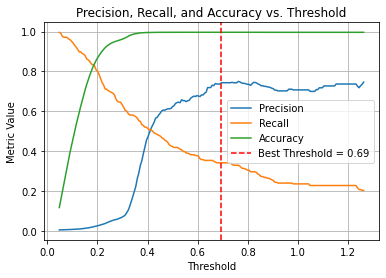

In [37]:
# Plot precision, recall, and accuracy vs. threshold
plt.plot(threshold_values, precisions, label='Precision')
plt.plot(threshold_values, recalls, label='Recall')
plt.plot(threshold_values, accuracies, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, and Accuracy vs. Threshold')
# Add best threshold line
best_threshold_index = np.argmax(np.array(precisions) + np.array(recalls))
best_threshold = threshold_values[best_threshold_index]
print(best_threshold)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.legend()
plt.legend()
plt.grid(True)
plt.show()

- We compute the reconstruction loss of the test dataset.

In [38]:
data_tensor = torch.tensor(test_data_x, dtype=torch.float)
complete_loader = DataLoader(TensorDataset(data_tensor, data_tensor), batch_size=1, shuffle=False)

reconstructed_loss_test = [vae_loss(*vae(inputs), inputs).item() for inputs, _ in complete_loader]

- We predict the labels of the test data based to optimal threshold.

In [39]:
th = best_threshold
preds_test = [0 if r < th else 1 for r in reconstructed_loss_test]

- We plot the reconstruction loss of the test dataset along with the threshold line.


56863
246


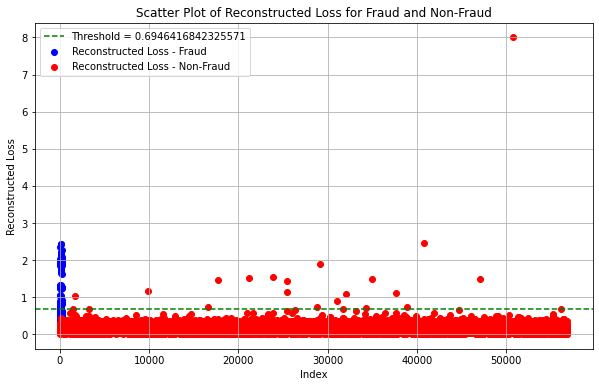

In [40]:
reconstructed_loss_test_nf = reconstructed_loss_test[:t_nf]
print(len(reconstructed_loss_test_nf))

reconstructed_loss_test_f = reconstructed_loss_test[t_nf:]
print(len(reconstructed_loss_test_f))

plt.figure(figsize=(10, 6))

plt.scatter(range(len(reconstructed_loss_test_f)), reconstructed_loss_test_f, c='blue', label='Reconstructed Loss - Fraud')

plt.scatter(range(len(reconstructed_loss_test_nf)), reconstructed_loss_test_nf, c='red', label='Reconstructed Loss - Non-Fraud')
plt.axhline(y=th, color='green', linestyle='--', label=f'Threshold = {th}')
plt.xlabel('Index')
plt.ylabel('Reconstructed Loss')
plt.title('Scatter Plot of Reconstructed Loss for Fraud and Non-Fraud')
plt.legend()
plt.grid(True)
plt.show()

- We get the accuracy 0.99

In [41]:
accuracy = accuracy_score(test_labels, preds_test)
print("Accuracy:", accuracy)

Accuracy: 0.9968831532683115


- We plot the ROC Curve.
- We find the aread under curve which is 0.80

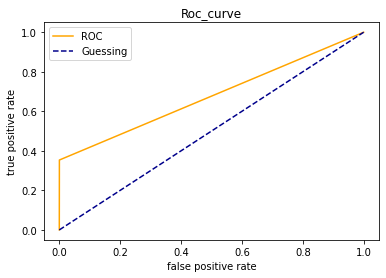

0.6766622000760921


In [42]:
from sklearn.metrics import roc_curve,roc_auc_score

#potting roc curve
fpr, tpr, thresholds = roc_curve(test_labels, preds_test)

plt.plot(fpr, tpr, color = 'orange', label = "ROC")
plt.plot([0,1],[0,1], color='darkblue', linestyle="--",label = "Guessing")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc_curve")
plt.legend()
plt.show()


auc_score = roc_auc_score(test_labels, preds_test)
print(auc_score)


- We find the confusion matrix

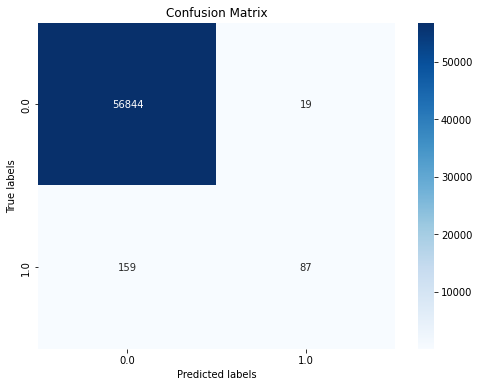

In [43]:
## confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(test_labels, preds_test)


classes = np.unique(test_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

- F1 Score for the varitional autoencoders is 0.49

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.82      0.35      0.49       246

    accuracy                           1.00     57109
   macro avg       0.91      0.68      0.75     57109
weighted avg       1.00      1.00      1.00     57109



## SUMMARY

### Dataset Description

The dataset consists of credit card transaction data, categorized into two classes: Fraud and Non-Fraud. 

- **Class Distribution**: 
  - 99.8% of the data belong to the Non-Fraud class.
  - This indicates a severe class imbalance, with a significantly larger proportion of Non-Fraud instances compared to Fraud instances.

- **Normalization**:
  - To ensure that all features are on the same scale and to facilitate effective model training, the data is normalized.


### Data Splitting

- Split the data into two classes: Fraud and non-fraud.
- Further divide the non-fraud class into a training set and a test set in a 0.8:0.2 ratio.
- Split the training set for the non-fraud class into a training set and a validation set in a 0.8:0.2 ratio.
- Use the training set for the non-fraud class exclusively for training the autoencoders and variational autoencoders.
- Do not use the fraud class data during the training process.
- Split the fraud class data into a validation set and a test set in a 0.5:0.5 ratio.
- Utilize the validation set for the fraud class to tune hyperparameters.


### Method Used

We train our model on the non-fraudulent data. The model learns the representation of the non-fraudulent data. Therefore, when a new data point is passed through our model, it will exhibit a high reconstruction loss if the data point is fraudulent and a lower reconstruction loss if the data point is non-fraudulent. We establish a threshold; if the reconstruction loss of a test point is less than that threshold, we classify it as non-fraudulent; otherwise, we classify it as fraudulent.


### Architecture
#### Autoencoder 

- Implemented code in PyTorch

###### Encoder Architecture:

  - Input layer: (30, 14) linear transformation followed by the RELU activation function.
  - Hidden layer: (14, 7) linear transformation followed by the RELU activation function.

###### Decoder Architecture:

  - Hidden layer: (7, 14) linear transformation followed by the RELU activation function.
  - Output layer: (14, 30) linear transformation followed by the sigmoid activation function.
    - The sigmoid activation ensures that the output values are within the range [0, 1], consistent with the input data.

###### Loss Function:
- Using the Mean Squared Error (MSE) loss function to minimize the reconstruction loss.
  - Objective: to minimize the difference between the output and the input, aiming to reconstruct the input data as accurately as possible.

###### Optimizer:
  - Utilizing the Adam optimizer with a learning rate of 0.01 for training the model.


#### Variational Autoencoder 

- **Input Dimension**: 30 
- **Latent Dimension**: 7 

###### Encoder Architecture:
- Input Layer: Fully connected layer with 30 input features, followed by ReLU activation.
- Hidden Layer: Fully connected layer with 14 units, followed by ReLU activation.
- Output Layer: Fully connected layer with `2 * latent_dim` units (14 units for each mean and log-variance of the latent space), followed by ReLU activation.

###### Decoder Architecture:
- Input Layer: Fully connected layer with `latent_dim` units, followed by ReLU activation.
- Hidden Layer: Fully connected layer with 14 units, followed by ReLU activation.
- Output Layer: Fully connected layer with 30 units (same as input dimension), followed by Sigmoid activation to constrain output values between 0 and 1.

###### Loss Function:
- **Reconstruction Loss (MSE)**: Measures the average squared difference between reconstructed output and original input. Encourages accurate data reconstruction.
- **KL Divergence**: Compares the inferred latent distribution to a standard normal distribution. Encourages a well-structured latent space resembling the standard distribution.

###### Optimizer:
Adam optimizer with a learning rate of 0.001 is used for training the VAE.


### Finding Threshold

#### Training Dataset (Non-Fraud)
- Compute the reconstruction loss of the training dataset, consisting of the non-fraud dataset.
- Calculate the mean and standard deviation of the reconstruction loss of the training dataset. These statistics will be used to determine the threshold.

#### Validation Set
- Compute the reconstruction loss of the validation dataset.
- Define a range of threshold values based on the mean and standard deviation of the reconstruction loss.
- Classify the validation data for each threshold and calculate precision, recall, and accuracy.
- Choose the threshold value for which the highest sum of precision and recall is achieved as the optimal threshold.


### RESULTS
The results we obtained are:
#### Autoencoder
- **Accuracy**: 0.99
- **ROC Curve AUC**: 0.80
- **F1-score for Fraud (Class 1)**: **0.61**

#### Variational Autoencoder
- **Accuracy**: 0.99
- **ROC Curve AUC**: 0.67
- **F1-score for Fraud (Class 1)**: **0.49**

